In [85]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


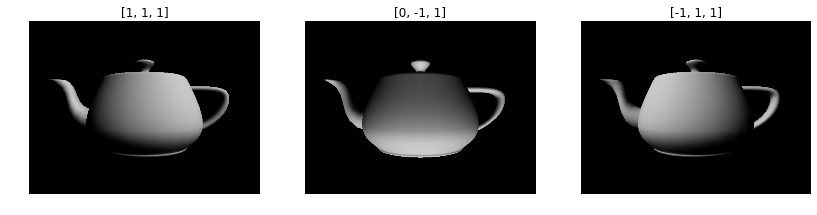

In [86]:
teapots = [imread(filename) for filename in ["teapot_1_1_1.png", "teapot_0_-1_1.png", "teapot_-1_1_1.png"]]
transforms = [[1,1,1],[0,-1,1],[-1,1,1]]

figure(figsize=(14,14))
for idx, teapot in enumerate(teapots):
    subplot(1,3,idx+1)
    axis('off')
    title(transforms[idx])
    imshow(teapot)

We wish to solve the linear equation system $$I = pL\cdot N$$ for each pixel, where:  
$I$ - the light intensity at the pixel  
$L$ - the light direction (`transforms` here)  
$N$ - the surface normal at the pixel (unknown)
$p$ - albedo at the pixel

As $L$ is square (3x3), we can invert it, obtaining the equation
$$L^{-1}I = pN$$
As the normal $N$ has unit length, $p$ is the length of the vector $pN$.


In [87]:
L_inv = linalg.inv(transforms)
pN = empty_like(teapots[0])

for x in range(teapots[0].shape[0]):
    for y in range(teapots[0].shape[1]):
        pN[x][y] = dot(L_inv, array([teapots[i][x][y][0] for i in range(3)]))

We may now compute the albedos of the pixels by as length of the vector $pN$.

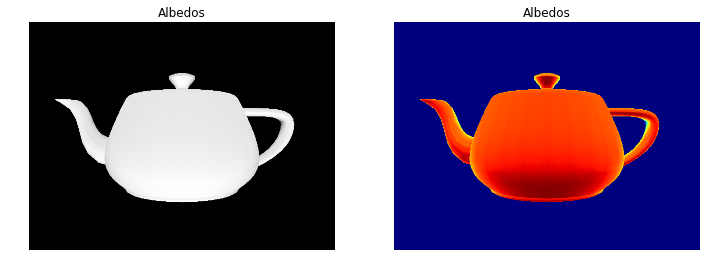

In [88]:
albedos = linalg.norm(pN, axis=2)


figure(figsize=(12,12))
subplot(1,2,1)
title('Albedos')
axis('off')
imshow(albedos, cmap="Greys_r")
subplot(1,2,2)
title('Albedos')
axis('off')
imshow(albedos)

And finally display the normals (with X as green, Y as red and Z normalized to 1)

/home/kyp/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


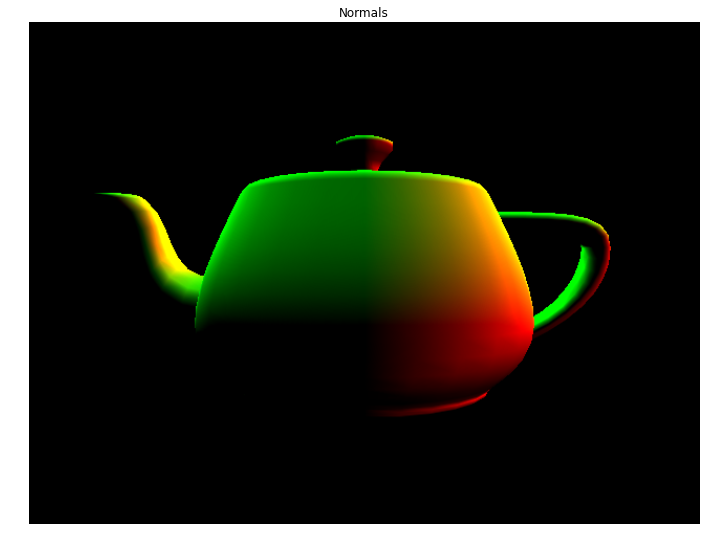

In [89]:
N = pN / pN[:,:,2][:,:,np.newaxis]
N = clip(N, 0, 1)

figure(figsize=(12,12))
title('Normals')
axis('off')
imshow(dstack((N[:,:,0],N[:,:,1],zeros_like(N[:,:,1]))))